Ken Li - 66205186 - lik16

CSCI 4170 - Projects in ML and AI

Professor Mushtaque

January 21, 2025

Task 1 (20 points): Advanced Objective Function and Use Case

1. Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE). Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE (include citations).
2. Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class).
3. Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.

1. Like in class, assume that the data is distributed along a sigmoid curve, denote $\mu_n$ to be $σ(x^Tu)$, or the evaluated probability for some outcome $y_n$ to equal 1 given some input $x_n$, and similarly denote the evaluated probability for some outcome $y_n$ to equal 0 as $1-\mu_n$. What we are now trying to do is find the $u$ such that the product of all the $mu_n$ for $y_n = 1$ and $1-mu_n$ for all $y_n = 0$ is maximized. Thus, the negative log-likelihood can be written as
$-log \sum_{n=1}^N \mu_n^{y_n} * (1-\mu_n)^{1-y_n}$, and distributing the log, we get $-\sum_{n=1}^N log(\mu_n^{y_n}) + log((1-\mu_n)^{1-y_n})$ = $-\sum_{n=1}^N y_nlog(\mu_n) + (1-y_n)log((1-\mu_n))$, the desired loss function.
  
  MLE simply attempts to find the most suited model based on the data. MAP attempts to find the most suited model but with some additional initial assumptions about the data. Sources:
https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html
https://sassafras13.github.io/MLEvsMAP/

2. One machine learning problem that can be best solved using logistic regression is the probability that someone has a stroke or heart attack depending on factors such as age, drinking, smoking, etc. Logistic regression is the best choice here because it has the most intuitive interpretation; it gives a probability that someone will have a stroke given the input vector, while linear classification will just give a yes/no answer without any understanding about if the person is very likely or just slightly likely to have the stroke while linear regression will give a number that might still be useful but may be harder to interpret.

3. In this example, $y_n$ will corresponding to whether the person had a stroke or not (1 if they did, 0 if they did not). $x^T$ will be the transpose of the vector of factors (age, drinking habits, smoking habits, etc.). $u$ will be what we want to solve for/maximize in order to get the most accurate model. All this assumes that the most accurate model does indeed pertain to the given sigmoid model; if sigmoid is not the best (i.e. if there is a linear relationship between a factor and the likelihood of stroke), then this model will be worse off.

Task 2 (20 points): Dataset and Advanced EDA
1. Select a publicly available dataset (excluding commonly used datasets such as Titanic,
Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10
features to allow for more complex analysis.
2. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among
features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and
demonstrate steps to handle them.
3. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced
visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).


1. https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
This is my data set; I intend to compare the quality rating of the wine with the input vector consisting of the other data (i.e. fixed acidity, citric acid, etc.)

In [152]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Description
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  159

<Axes: >

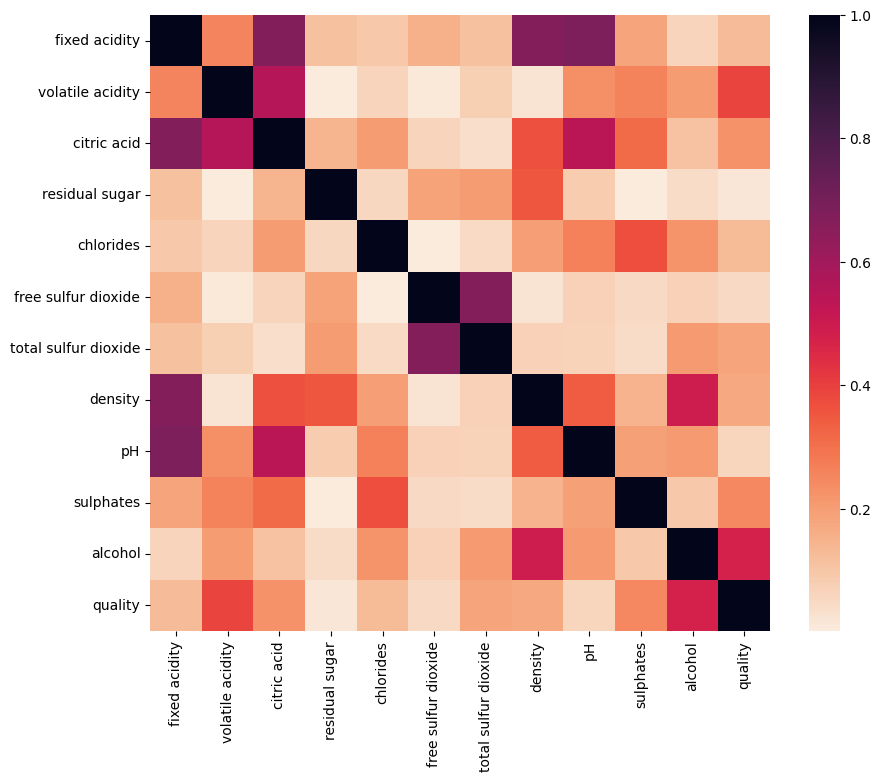

In [153]:
#data source https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
df = pd.read_csv('winequality-red.csv')

df.info()

print("Description")
print(df.describe())


print("VIF")
#Source from https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
# calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

2. It appears as though density and pH have strong correlation with other variables, and as such should be omitted to avoid strong multicollinearity.

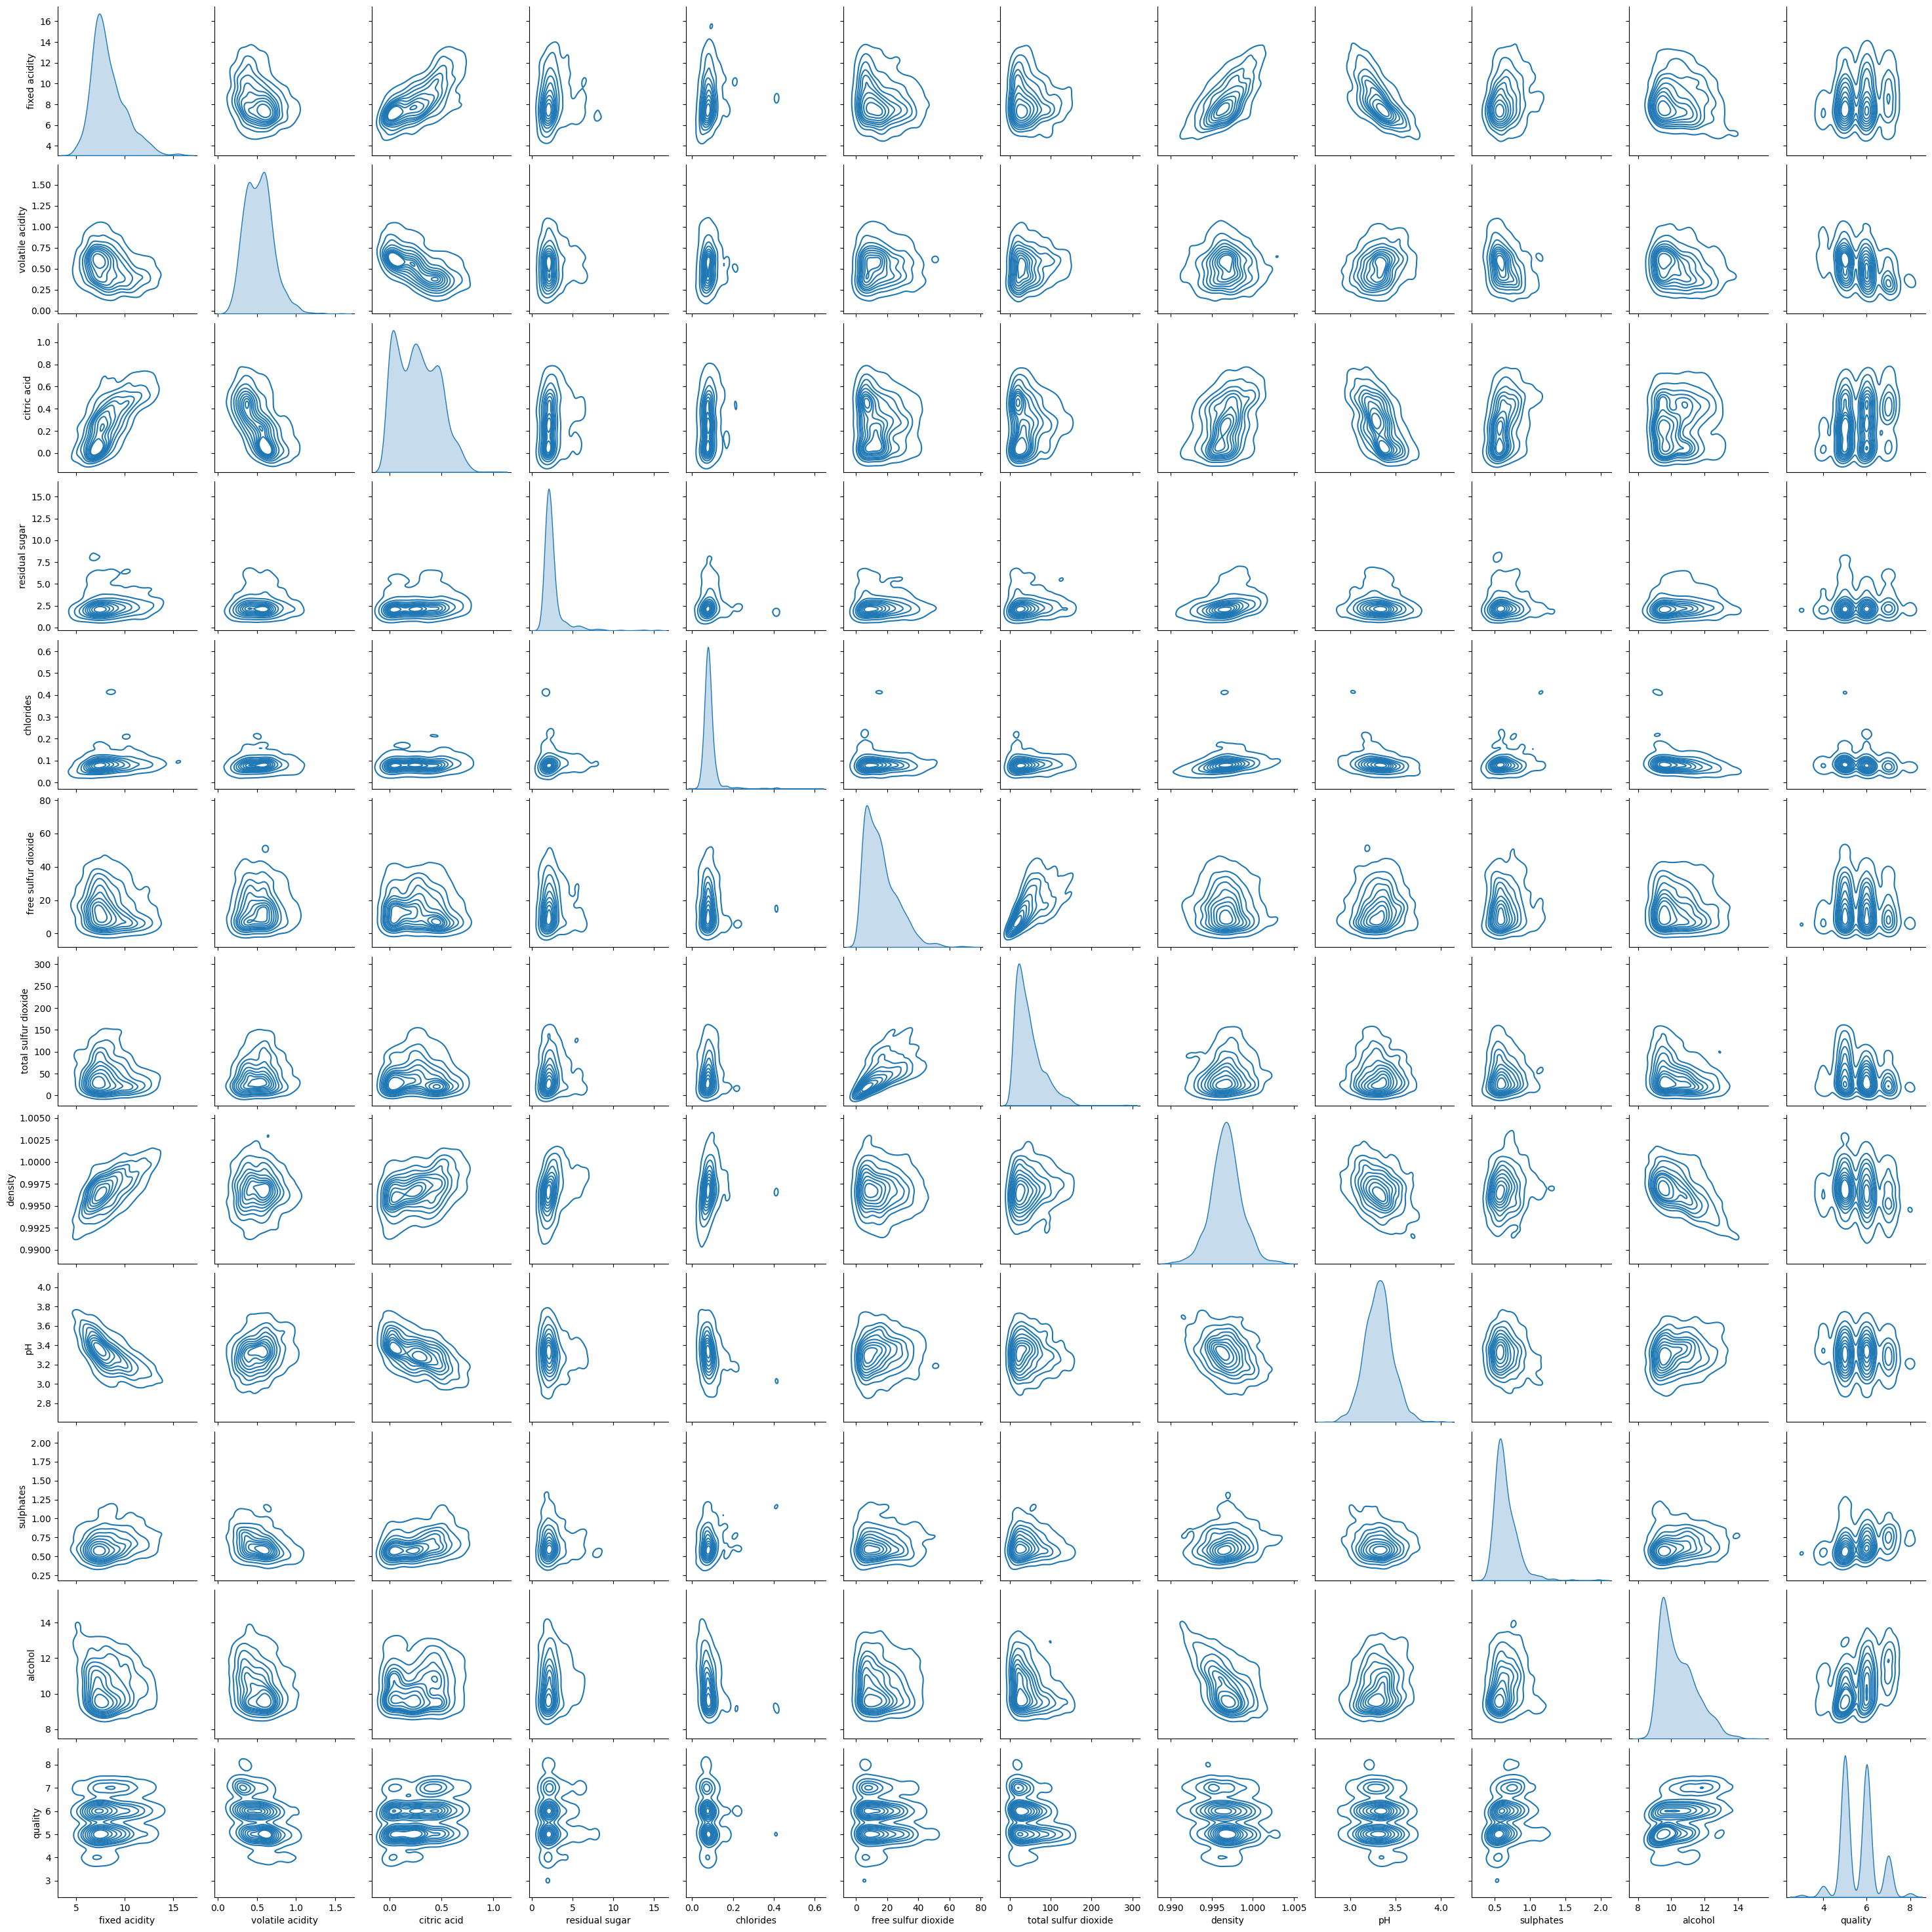

In [154]:
import seaborn as sns
sns.pairplot(df, kind='kde')
plt.show()

Task 3 (20 points): Logistic Regression Implementation
1. Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.
2.  Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

In [155]:
import math
def sigmoid(z):
  return 1/(1+np.exp(-z))

#Takes in a vector y_n and a vector of x_n, which are vectors of features
def cost(X,y,w):
  # print("X is")
  # print(X)
  # print("Y is")
  # print(Y)
  # print("w is")
  # print(w)
  A = sigmoid(np.dot(X,w))
  n = len(X)
  return -1/n * np.sum(y * np.log(A) + (1-y) * (np.log(1-A)))

def gradientDescent(X,y,w,theta,iterations):
  #adds a 1 term as a bias
  X = np.hstack([np.ones((X.shape[0], 1)), X])
  for i in range(iterations):
    A = sigmoid(np.dot(X,w))
    n = len(X)
    # print("X is")
    # print(X)
    # print("A-y is")
    # print(A-y)
    gradient = np.dot(X.T,(A-y))/n
    #print("Calculating gradient")
    #print(gradient)
    w = w - theta * gradient
    # print("Cost is")
    # print(cost(X,y,w))
  print(cost(X,y,w))
  return w

def stochgradientDescent(X,y,w,theta,iterations):
  #adds a 1 term as a bias
  X = np.hstack([np.ones((X.shape[0], 1)), X])
  for i in range(iterations):
    for j in range(len(X)):
      gradient = np.dot(X[j].T,(sigmoid(np.dot(X[j],w))-y[j]))
      w = w - theta * gradient
      # print("Cost is")
      # print(cost(X,y,w))
  print(cost(X,y,w))
  return w

def minibatchgradientDescent(X,y,w,theta,iterations):
  #adds a 1 term as a bias
  X = np.hstack([np.ones((X.shape[0], 1)), X])
  for i in range(iterations):
    gradient = 0
    for j in range(len(X)):
      if (j%10 == 0):
        w = w -theta * gradient
        gradient = 0
        # print("Cost is")
        # print(cost(X,y,w))
      gradient += np.dot(X[j].T,(sigmoid(np.dot(X[j],w))-y[j]))
  print(cost(X,y,w))
  return w

def evaluateTestPerformance(X,y,w):
  X = np.hstack([np.ones((X.shape[0], 1)), X])
  Y = sigmoid(np.dot(X,w))
  for i in range(len(Y)):
    if (Y[i] < 0.5):
      Y[i] = 0
    else:
      Y[i] = 1
  return Y

def logistic_regression(X,y,theta,iterations):
  w = np.zeros(len(X[0])+1)
  wgrad = gradientDescent(X,y,w,theta,iterations)
  wstochgrad = stochgradientDescent(X,y,w,theta,iterations)
  wminibatch = minibatchgradientDescent(X,y,w,theta,iterations)
  return wgrad,wstochgrad,wminibatch

X = df.drop(['quality'],axis = 1)
Y = df.quality
logisticY = np.zeros(len(Y))
print(logisticY)
for i in range(len(Y)):
  if (Y[i] < 6):
    logisticY[i] = 0
  else:
    logisticY[i] = 1
X_train, X_test, y_train, y_test = train_test_split(X, logisticY, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# print(len(X_train))
# print(len(y_train))


# print(X_train[0])
# print(y_train)

wgrad,wstoch,wmini = logistic_regression(X_train,y_train,0.002,1000)

print("This is the test data")
print(y_test)

print("This is my normal prediction")
prediction = evaluateTestPerformance(X_test,y_test,wgrad)
print(prediction)
print("My weights are")
print(wgrad)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

print("This is my stochastic prediction")
prediction = evaluateTestPerformance(X_test,y_test,wstoch)
print(prediction)
print("My weights are")
print(wstoch)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

print("This is my mini batch prediction")
prediction = evaluateTestPerformance(X_test,y_test,wmini)
print(prediction)
print("My weights are")
print(wmini)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

print("This is the BIF prediction")
#Test that my gradient descent is vaguely right
lrg = LogisticRegression(class_weight='balanced', random_state=0)
lrg.fit(X_train, y_train)
print("The good weights are")
print(lrg)
y_pred_lrg = lrg.predict(X_test)
print(y_pred_lrg)
accuracy = accuracy_score(y_test, y_pred_lrg)
print(accuracy)

[0. 0. 0. ... 0. 0. 0.]
0.6270141954971274
0.729438905696688
2.207434778218711
This is the test data
[1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1

At the very end, I had that the cost function for normal gradient descent, stochastic gradient descent, and minibatch gradient descent had a cost function of 0.6270141954971274, 0.729438905696688, and 2.207434778218711 respectively. However, normal gradient descent performed the worst on the testing data with a 0.63125, while minibatch gradient descent got a 0.7 and stochastic gradient descent got 0.73125.

Task 4 (40 points): Optimization Techniques and Advanced Comparison
1. Implement or use packages to incorporate any three optimization algorithms (e.g.,
Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic
gradient descent implementation from Task 3.
2.  Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze
and interpret results for each algorithm.
3. Perform a hyperparameter tuning process (manual or automated using grid
search/random search) for each optimization algorithm and assess its impact on
performance. If you have to do some research for these techniques, please cite your
sources.
4. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets

In [156]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# Example model with momentum in SGDClassifier


def logtobin(X):
  if (X < 0.5):
    return 0
  else:
    return 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(11,))
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.005),
              loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
predictions = model.predict(X_test)
for i in range(len(predictions)):
  predictions[i] = logtobin(predictions[i])

print(f1_score(predictions,y_test))
print(precision_score(predictions,y_test))
print(recall_score(predictions,y_test))
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.005,momentum = 0.1),
              loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
predictions = model.predict(X_test)
for i in range(len(predictions)):
  predictions[i] = logtobin(predictions[i])

print(f1_score(predictions,y_test))
print(precision_score(predictions,y_test))
print(recall_score(predictions,y_test))
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.005),
              loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
predictions = model.predict(X_test)
for i in range(len(predictions)):
  predictions[i] = logtobin(predictions[i])

print(f1_score(predictions,y_test))
print(precision_score(predictions,y_test))
print(recall_score(predictions,y_test))
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4876 - loss: 5.9607
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 1.1977
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - loss: 1.0019
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6335 - loss: 0.9777
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - loss: 0.9080
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6452 - loss: 0.7876  
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6455 - loss: 0.6795 
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6236 - loss: 0.6862 
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - loss: 0.6369
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6666 - loss: 0.6071 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.690537084398977
0.7541899441340782
0.6367924528301887
0.621875
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

1. (I used google to figure out that keras had all three of these built in, and I used https://www.educative.io/answers what-are-the-different-types-of-keras-models to understand how to use keras models). In the end, all three are roughly about as good as my vanilla gradient descent model (around a 60-70% accuracy); they will likely outperform my gradient descent with more iterations or perhaps if my momentum was lower (it was initially 0.9, which had horrible accuracy).

2. For both Adam and SGD with momentum, f1, recall, and precision scores were around 55%, which indicates that they're marginally better than random for both identifying positives and being correct on positives. RMSProp, however, has a very high precision with about the same recall score, so it is good at identifying true positives.

3. I already decreased the momentum of SGD from 0.9 to 0.1, which greatly improved the accuracy for this problem. I initially set the learning rate to 0.001, and increasing it to 0.002 seemed to improve it, but jumping to a learning rate of 0.005 drastically reduced its accuracy.

4. Adam and both SGD with momentum seemed to take the most time (RMSProp consistently finished in at most 1 second, while these two would sometimes take 3-4 seconds). All three require more memory for past gradient information, but Adam and SGD with momentum seem to require slightly more calculations as well.